In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction/data.csv


# Objective
### To predict whether a patient is at risk for a heart attack. This is a binary outcome.

Positive (+) = 1, patient is at risk
Negative (-) = 0, patient is not at risk

# Understanding the Dataset
* age (#)
* sex : 1 = Male, 0 = Female (Binary)
* (cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
* (trestbps) resting blood pressure (#)
* (chol) serum cholestoral in mg/dl (#)
* (fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]
* (restecg) resting electrocardiographic results [values 0,1,2]
* (thalach) maximum heart rate achieved (#)
* (exang) exercise induced angina (Binary) [1 = yes; 0 = no]
* (oldpeak) = ST depression induced by exercise relative to rest (#)
* (slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)
* (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy
* (thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

# Exploring the Dataset 

In [2]:
data=pd.read_csv('/kaggle/input/heart-attack-prediction/data.csv')
data.shape

(294, 14)

In [3]:
data.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

## visualization of Correlation in Data

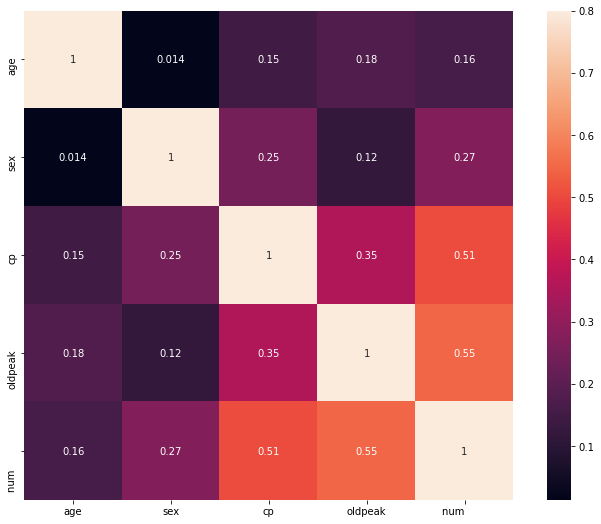

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

**OldPeak**(ST depression induced by exercise relative to rest) and **CP** ( Chest Pain Type ) have the most correlation with **target** ( diagnosis of heart disease)

# Preprocessing the Data

In [5]:
data.rename(columns={'num       ': 'target'}, inplace=True) 
data=data.replace('?',None)
data=data.replace('?',0)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,243,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,6,0


In [6]:
#Getting Pandas Dummies for ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','thal','ca'])

In [7]:
#Scaling the other attributes using normal scaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

# Final Preprocessed Data

In [8]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_0,slope_1,slope_2,slope_3,thal_0,thal_3,thal_6,thal_7,ca_0,ca_0
0,-2.542347,-0.148467,-1.681029,1.951999,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1,-2.414117,-0.717561,-0.117167,0.889244,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
2,-2.414117,0.420626,-0.117167,1.314346,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3,-2.285888,2.127905,-0.201700,1.314346,-0.646074,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,-2.157658,-1.855747,-0.455300,0.464142,-0.646074,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0


# Splitting data as Train and Test

In [9]:
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

#80% Train and 20% Test Data

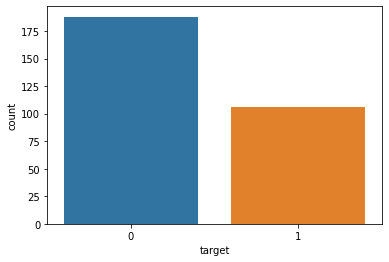

In [10]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

In [11]:
#Analysing the shape of X_train and X_test Data

print(X_train.shape)
print(X_test.shape)

(235, 28)
(59, 28)


 # MODELS

     1) SVM
     2) Random Forest
     3) Logistic Regression
     4) Multi-layer Perceptron classifier 

# 1) Using SVM

## Running SVM model with Various Kernals

In [12]:
from sklearn.svm import SVC

#Function for storing model scores using various kernals
svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for type in kernel_type:
    svc_classifier = SVC(kernel = type)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

<BarContainer object of 4 artists>

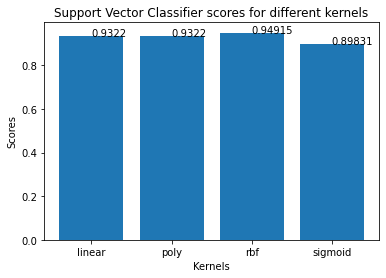

In [13]:
#Plotting the accuracy

for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.bar(kernel_type, svc_scores)

We can see that the **rbf** kernel gives the maximum accuracy. Training the final model in rbf

In [14]:
#Training the model on 'rbf' Kernal

svc =  SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(svc_conf_matrix)
print(classification_report(y_test, svc_predicted))
print("\n")
print("Accuracy of Support Vector Classifier: {:.3f}".format(svc_acc_score*100),'%\n')

confussion matrix
[[31  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.93      0.96      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



Accuracy of Support Vector Classifier: 94.915 %



# 2) Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500,random_state=1)
model.fit(X_train,y_train)
rfpred=model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, rfpred)
rf_acc_score = accuracy_score(y_test, rfpred)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(RF_conf_matrix)
print(classification_report(y_test, rfpred))
print("\n")
print("Accuracy of Random Forest Classifier: {:.3f}".format(rf_acc_score*100),'%\n')

confussion matrix
[[31  2]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      1.00      0.96        26

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



Accuracy of Random Forest Classifier: 96.610 %



# 3) Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,lr_predict))
print("Accuracy of Logistic Regression: {:.3f}".format(lr_acc_score*100),'%\n')

confussion matrix
[[30  3]
 [ 0 26]]


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.90      1.00      0.95        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Accuracy of Logistic Regression: 94.915 %



# 4) Multi-layer Perceptron classifier 

In [17]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(32), learning_rate_init=0.001, max_iter=150)
model = MLP.fit(X_train, y_train)
MLP_predict = MLP.predict(X_test)
MLP_conf_matrix = confusion_matrix(y_test, MLP_predict)
MLP_acc_score = accuracy_score(y_test, MLP_predict)


#Printing the confussion matrix and accuracy scoresprint("confussion matrix")
print(MLP_conf_matrix)
print("\n")
print(classification_report(y_test,MLP_predict))
print("Accuracy of Multilayer Perceptron classifier: {:.3f}".format(MLP_acc_score*100),'%\n')

[[30  3]
 [ 0 26]]


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.90      1.00      0.95        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Accuracy of Multilayer Perceptron classifier: 94.915 %



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### We can see that the random forest gives an accuracy about 96%. This is my first public notebook in kaggle, It will be great if you guys show some love. Also, Let me know if you have any questions or suggestions below! Thanks a lot for your time :)